In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# starting url for weather map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
#create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
#Create a list for holding the cities

cities = []

#identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)


608

In [6]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging

print("Beginning Data Retrieval      ")

print("------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list.
for i, city in enumerate(cities):
    
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count =1
        time.sleep(60)
        
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%y-%m-%d %H:%M:S")
        
        #append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    #if an error is experienced, skip the city,
    except:
        print("City not found. Skipping ...")
        pass

#Indicate that Data Loading is complete.
print("------------------------------")

print("Data Retrieval Complete       ")

print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | gotsu
Processing Record 4 of Set 1 | evensk
Processing Record 5 of Set 1 | tumannyy
City not found. Skipping ...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | san nicolas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | buckeye
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | harper
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Se

Processing Record 33 of Set 4 | xunchang
Processing Record 34 of Set 4 | west wendover
Processing Record 35 of Set 4 | indramayu
Processing Record 36 of Set 4 | lakes entrance
Processing Record 37 of Set 4 | bafoulabe
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | camacha
Processing Record 41 of Set 4 | oktyabrskiy
Processing Record 42 of Set 4 | oranjemund
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | pasco
Processing Record 47 of Set 4 | korop
Processing Record 48 of Set 4 | nenjiang
Processing Record 49 of Set 4 | merrill
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | hearst
Processing Record 3 of Set 5 | nuevo progreso
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | villa carlos paz
Processing Record 6 of Set 5 | grodko

Processing Record 23 of Set 8 | formosa
Processing Record 24 of Set 8 | ochakiv
Processing Record 25 of Set 8 | aripuana
Processing Record 26 of Set 8 | paradwip
City not found. Skipping ...
Processing Record 27 of Set 8 | ilanskiy
Processing Record 28 of Set 8 | strezhevoy
Processing Record 29 of Set 8 | tole
Processing Record 30 of Set 8 | pho chai
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | pedro ii
Processing Record 33 of Set 8 | luderitz
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | strathpeffer
Processing Record 37 of Set 8 | lawigan
Processing Record 38 of Set 8 | leshukonskoye
Processing Record 39 of Set 8 | jimma
Processing Record 40 of Set 8 | plainview
Processing Record 41 of Set 8 | kurumkan
Processing Record 42 of Set 8 | indianola
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | yeppoon
Processing Record

City not found. Skipping ...
Processing Record 10 of Set 12 | aklavik
Processing Record 11 of Set 12 | acapulco
Processing Record 12 of Set 12 | phuket
Processing Record 13 of Set 12 | los andes
Processing Record 14 of Set 12 | grafton
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | nurota
Processing Record 17 of Set 12 | conakry
Processing Record 18 of Set 12 | malacacheta
Processing Record 19 of Set 12 | fallon
Processing Record 20 of Set 12 | sinjah
City not found. Skipping ...
Processing Record 21 of Set 12 | stepnogorsk
Processing Record 22 of Set 12 | luena
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | tongren
Processing Record 26 of Set 12 | mazamari
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | zhovtneve
Processing Record 29 of Set 12 | laiagam
City not found. Skipping ...
Processing Record 30 of Set 12 | kathmandu
Processing Record 31 of Set 12 | opari

In [7]:
len(city_data)

557

In [8]:
#conver the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.11,56,75,9.22,CL,22-06-04 02:07:S
1,Hobart,-42.8794,147.3294,56.26,67,75,5.75,AU,22-06-04 02:06:S
2,Gotsu,35.0000,132.2167,75.33,48,90,11.79,JP,22-06-04 02:07:S
3,Evensk,61.9500,159.2333,53.24,69,100,7.25,RU,22-06-04 02:07:S
4,Yellowknife,62.4560,-114.3525,68.56,30,2,11.99,CA,22-06-04 02:04:S
5,San Nicolas,18.1725,120.5953,87.71,70,75,6.91,PH,22-06-04 02:07:S
6,Ushuaia,-54.8000,-68.3000,42.46,49,100,18.41,AR,22-06-04 02:07:S
7,Saint-Philippe,-21.3585,55.7679,72.99,69,57,13.47,RE,22-06-04 02:07:S
8,Vaini,-21.2000,-175.2000,80.76,78,20,8.05,TO,22-06-04 02:07:S
9,Buckeye,33.3703,-112.5838,99.30,9,100,11.50,US,22-06-04 02:05:S


In [9]:
#rearrange the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,22-06-04 02:07:S,-53.1500,-70.9167,41.11,56,75,9.22
1,Hobart,AU,22-06-04 02:06:S,-42.8794,147.3294,56.26,67,75,5.75
2,Gotsu,JP,22-06-04 02:07:S,35.0000,132.2167,75.33,48,90,11.79
3,Evensk,RU,22-06-04 02:07:S,61.9500,159.2333,53.24,69,100,7.25
4,Yellowknife,CA,22-06-04 02:04:S,62.4560,-114.3525,68.56,30,2,11.99


In [10]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

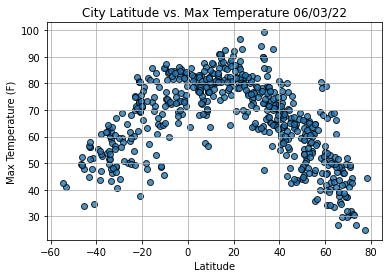

In [12]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker ="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

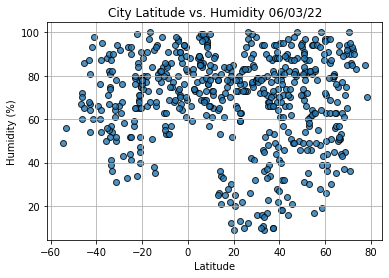

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

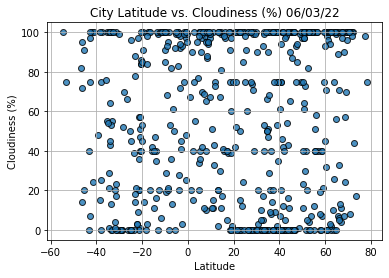

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

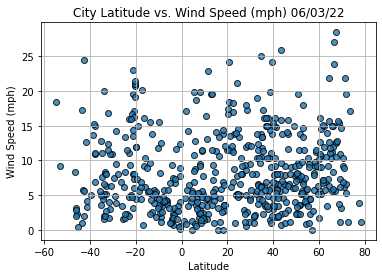

In [15]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#import linregress
from scipy.stats import linregress

#create a function to create perform linear regression on the weather data and plot a regressin lnie and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data.
    (slope, intercept, r_vlue, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line y values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #annotate the text for the line equataion
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Harper
Country                     LR
Date          22-06-04 02:07:S
Lat                      4.375
Lng                    -7.7169
Max Temp                 77.07
Humidity                    88
Cloudiness                  77
Wind Speed                5.57
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

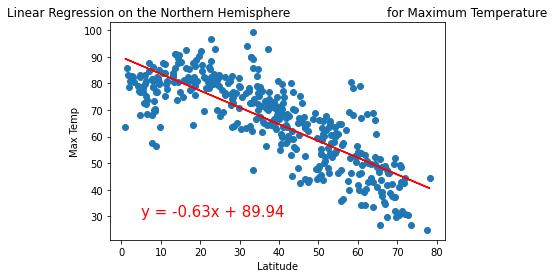

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,30))

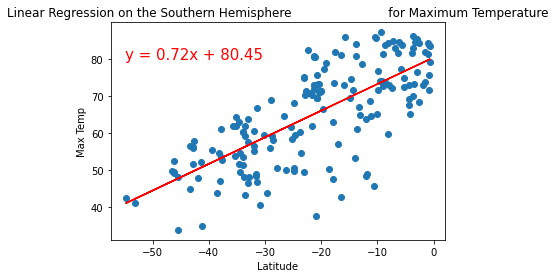

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

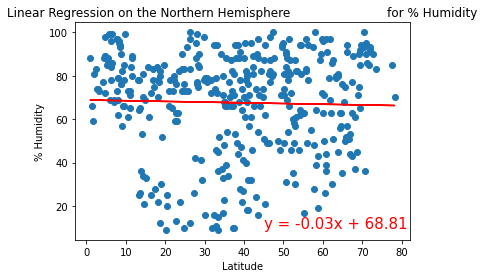

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

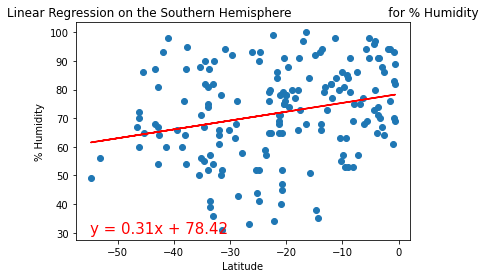

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))


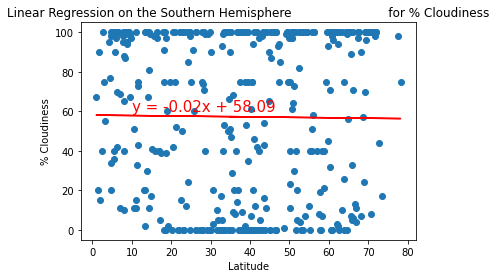

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

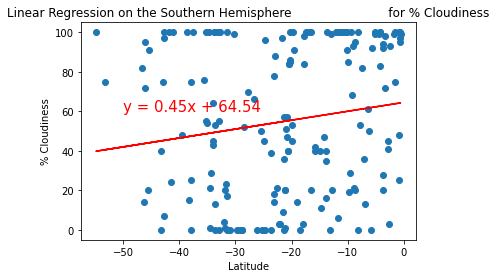

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

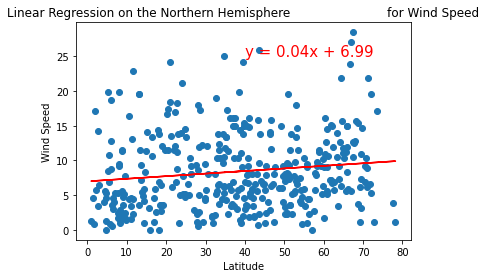

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

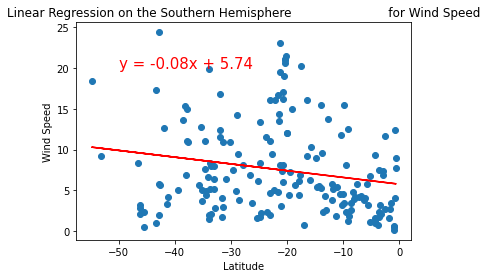

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))